# Imbalanced Datasets

In this unit, we will explore some techniques to deal with imbalanced datasets. It is not unusual that in some classification problems, some classes are underrepresented. Think, for example, if you wanted a model to detect a rare medical condition. Of course, you would have a much higher representation of healthy individuals and naively training a model might cause it to always predict a healthy individual. There are some ways of dealing with these datasets.

Original dataset shape Counter({0: 9900, 1: 100})


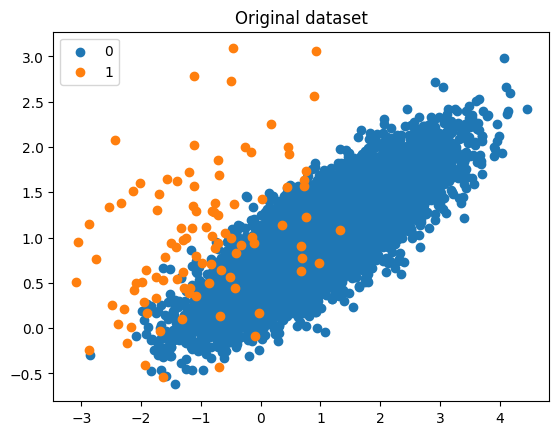

In [20]:
from collections import Counter
from sklearn.datasets import make_classification
from numpy import where
from matplotlib import pyplot

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0,
                           random_state=1)

counter = Counter(y)
print('Original dataset shape %s' % Counter(y))

for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.title('Original dataset')
pyplot.show()

# UnderSampling

## Random Undersampling

Random undersampling is a very simple technique that works well whenever we have loads of data. The simplest undersampling technique involves randomly selecting examples from the majority class and deleting them from the training dataset. This is referred to as random undersampling. Although simple and effective, a limitation of this technique is that examples are removed without any concern for how useful or important they might be in determining the decision boundary between the classes. This means it is possible, or even likely, that useful information will be deleted.

Resampled dataset shape Counter({0: 100, 1: 100})


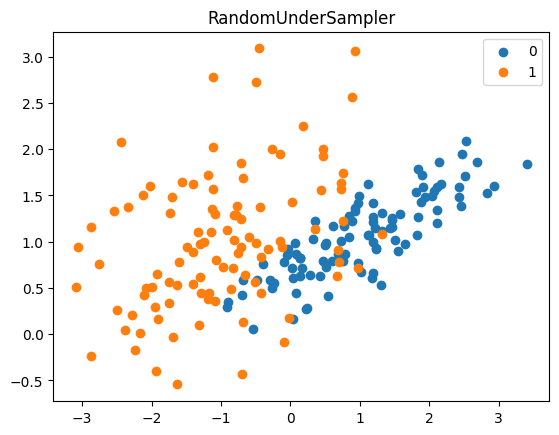

In [23]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1,random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))
counter = Counter(y_rus)

for label, _ in counter.items():
    row_ix = where(y_rus == label)[0]
    pyplot.scatter(X_rus[row_ix, 0], X_rus[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.title('RandomUnderSampler')
pyplot.show()

## Near Miss Undersampling

Near Miss refers to a collection of undersampling methods that select examples based on the distance of majority class examples to minority class examples.

-   NearMiss-1: Majority class examples with minimum average distance to three closest minority class examples.
-   NearMiss-2: Majority class examples with minimum average distance to three furthest minority class examples.
-   NearMiss-3: Majority class examples with minimum distance to each minority class example.

The NearMiss-3 seems desirable, given that it will only keep those majority class examples that are on the decision boundary.

Counter({0: 100, 1: 100})


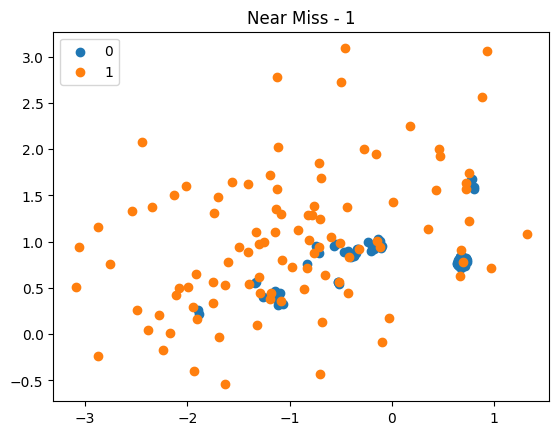

Counter({0: 100, 1: 100})


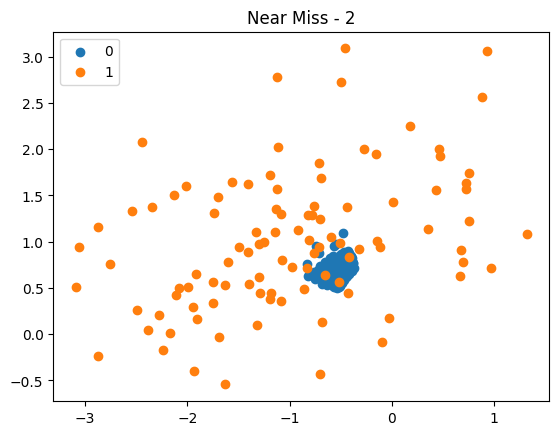

Counter({0: 100, 1: 100})


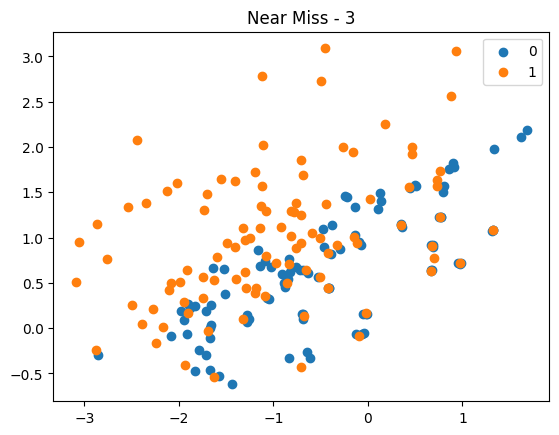

In [24]:
from imblearn.under_sampling import NearMiss

# define the undersampling method
for version in range(1,4):
    near_miss = NearMiss(version=version, n_neighbors=3)
    # transform the dataset
    X_nmiss, y_nmiss = near_miss.fit_resample(X, y)

    # summarize the new class distribution
    counter = Counter(y_under)
    print(counter)
    # scatter plot of examples by class label
    for label, _ in counter.items():
        row_ix = where(y_nmiss == label)[0]
        pyplot.scatter(X_nmiss[row_ix, 0], X_nmiss[row_ix, 1], label=str(label))
    pyplot.legend()
    pyplot.title('Near Miss - ' + str(version))
    pyplot.show()

## Condensed Nearest Neighbors

Condensed Nearest Neighbors, or CNN for short, is an undersampling technique that seeks a subset of a collection of samples that results in no loss in model performance, referred to as a minimal consistent set.

It is achieved by enumerating the examples in the dataset and adding them to the “store” only if they cannot be classified correctly by the current contents of the store.

When used for imbalanced classification, the store is comprised of all examples in the minority set and only examples from the majority set that cannot be classified correctly are added incrementally to the store.

Counter({0: 189, 1: 100})


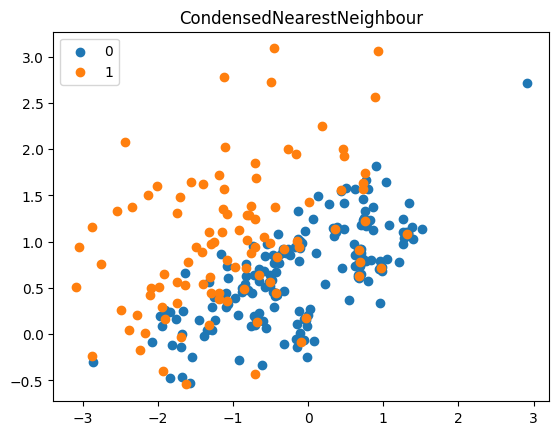

In [25]:
from imblearn.under_sampling import CondensedNearestNeighbour

# define the undersampling method
cnn = CondensedNearestNeighbour(n_neighbors=1)
# transform the dataset
X_cnn, y_cnn = cnn.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y_cnn)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y_cnn == label)[0]
    pyplot.scatter(X_cnn[row_ix, 0], X_cnn[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.title('CondensedNearestNeighbour')
pyplot.show()

## Tomek Links

A criticism of CNN is that examples are selected randomly, especially initially. This has the effect of allowing redundant examples into the store and in allowing examples that are internal to the mass of the distribution, rather than on the class boundary, into the store. Two modifications to the CNN procedure were proposed by Ivan Tomek. One of the modifications (Method2) is a rule that finds pairs of examples, one from each class; they together have the smallest Euclidean distance to each other in feature space. These cross-class pairs are now generally referred to as “Tomek Links” and are valuable as they define the class boundary.

Counter({0: 9874, 1: 100})


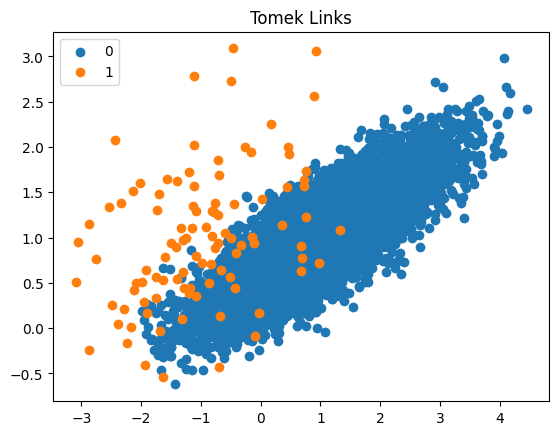

In [30]:
from imblearn.under_sampling import TomekLinks


# define the undersampling method
tom = TomekLinks()
# transform the dataset
X_tom, y_tom = tom.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y_tom)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y_tom == label)[0]
    pyplot.scatter(X_tom[row_ix, 0], X_tom[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.title('Tomek Links')
pyplot.show()

Because the procedure only removes so-named “Tomek Links“, we would not expect the resulting transformed dataset to be balanced, only less ambiguous along the class boundary. However, we can combine it with other methods to produce better undersampling techniques.

## One-Sided Selection

One-Sided Selection, or OSS for short, is an undersampling technique that combines Tomek Links and the Condensed Nearest Neighbor (CNN) Rule.

Specifically, Tomek Links are ambiguous points on the class boundary and are identified and removed in the majority class. The CNN method is then used to remove redundant examples from the majority class that are far from the decision boundary.

Counter({0: 1083, 1: 100})


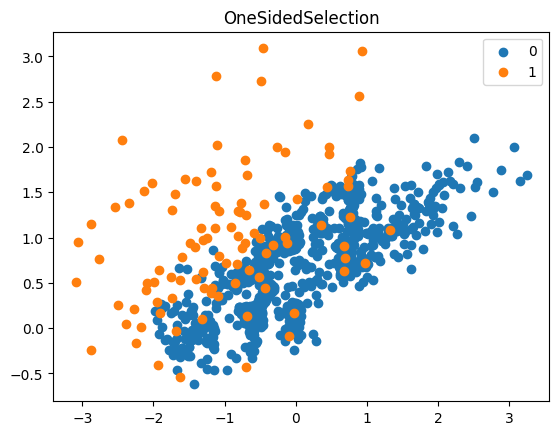

In [31]:
from imblearn.under_sampling import OneSidedSelection


# define the undersampling method
oss = OneSidedSelection(n_neighbors=1, n_seeds_S=200)
# transform the dataset
X_oss, y_oss = oss.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y_oss)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y_oss == label)[0]
    pyplot.scatter(X_oss[row_ix, 0], X_oss[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.title('OneSidedSelection')
pyplot.show()

## Edited Nearest Neighbors Rule

Another rule for finding ambiguous and noisy examples in a dataset is called Edited Nearest Neighbors, or sometimes ENN for short. This rule involves using $k=3$ nearest neighbors to locate those examples in a dataset that are misclassified and that are then removed before a $k=1$ classification rule is applied. 

When used as an undersampling procedure, the rule can be applied to each example in the majority class, allowing those examples that are misclassified as belonging to the minority class to be removed, and those correctly classified to remain.

It is also applied to each example in the minority class where those examples that are misclassified have their nearest neighbors from the majority class deleted.


Counter({0: 9806, 1: 100})


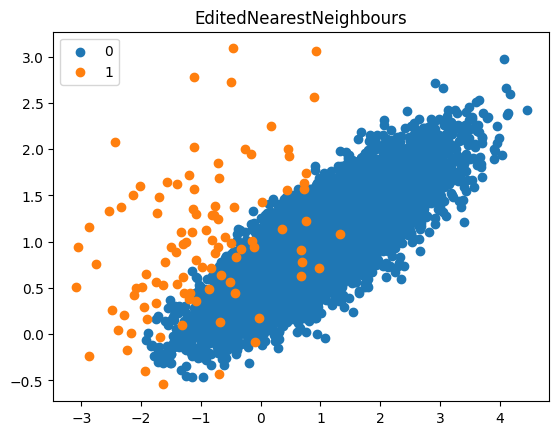

In [29]:
from imblearn.under_sampling import EditedNearestNeighbours

# define the undersampling method
enn = EditedNearestNeighbours(n_neighbors=3)
# transform the dataset
X_enn, y_enn = enn.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y_enn)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y_enn == label)[0]
    pyplot.scatter(X_enn[row_ix, 0], X_enn[row_ix, 1], label=str(label))
pyplot.title('EditedNearestNeighbours')
pyplot.legend()
pyplot.show()

Like Tomek Links, the procedure only removes noisy and ambiguous points along the class boundary. As such, we would not expect the resulting transformed dataset to be balanced, but we can use it with other methods to improve the results.

## Neighborhood Cleaning

The Neighborhood Cleaning Rule, or NCR for short, is an undersampling technique that combines both the Condensed Nearest Neighbor (CNN) Rule to remove redundant examples and the Edited Nearest Neighbors (ENN) Rule to remove noisy or ambiguous examples.

Like One-Sided Selection (OSS), the CSS method is applied in a one-step manner, then the examples that are misclassified according to a KNN classifier are removed, as per the ENN rule. Unlike OSS, less of the redundant examples are removed and more attention is placed on “cleaning” those examples that are retained.

The reason for this is to focus less on improving the balance of the class distribution and more on the quality (unambiguity) of the examples that are retained in the majority class.

The approach involves first selecting all examples from the minority class. Then all of the ambiguous examples in the majority class are identified using the ENN rule and removed. Finally, a one-step version of CNN is used where those remaining examples in the majority class that are misclassified against the store are removed, but only if the number of examples in the majority class is larger than half the size of the minority class.

Counter({0: 9786, 1: 100})


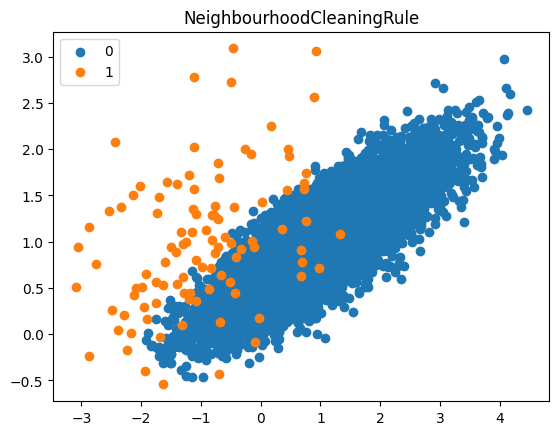

In [32]:
from imblearn.under_sampling import NeighbourhoodCleaningRule

# define the undersampling method
ncr = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)
# transform the dataset
X_ncr, y_ncr = ncr.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y_ncr)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y_ncr == label)[0]
    pyplot.scatter(X_ncr[row_ix, 0], X_ncr[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.title('NeighbourhoodCleaningRule')
pyplot.show()

# OverSampling

Unlike Undersampling, which focuses on removing the majority class examples, Oversampling focuses on increasing minority class samples. Let us explore the most common versions.


## Random Oversampling

It is the most basic for of oversampling. It consist on randomly selecting examples of the minority class to duplicate them.

Counter({0: 9900, 1: 9900})


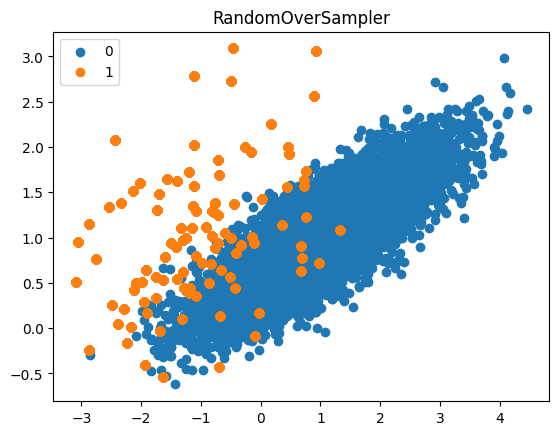

In [34]:
from imblearn.over_sampling import RandomOverSampler

# define the undersampling method
ros = RandomOverSampler()
# transform the dataset
X_ros, y_ros = ros.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y_ros)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y_ros == label)[0]
    pyplot.scatter(X_ros[row_ix, 0], X_ros[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.title('RandomOverSampler')
pyplot.show()

Since this technique is based on duplicating the examples to increase the minority class samples, it balances the data, but it does not provide additional information to the classification model.

## Synthetic Minority Oversampling Technique (SMOTE)

SMOTE selects the nearest examples in the feature space, then draws a line between them, and at a point along the line, it creates a new sample.

Counter({0: 9900, 1: 9900})


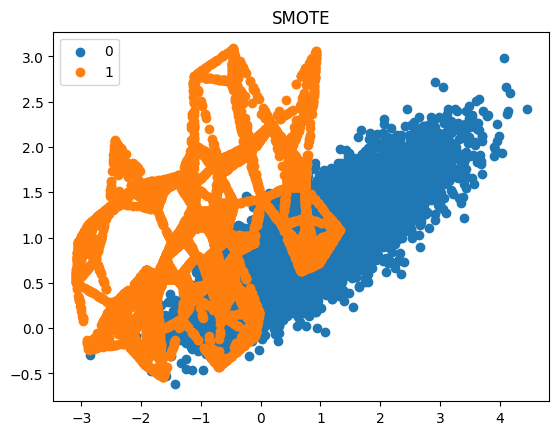

In [36]:
from imblearn.over_sampling import SMOTE

# define the undersampling method
smt = SMOTE()
# transform the dataset
X_smt, y_smt = smt.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y_smt)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y_smt == label)[0]
    pyplot.scatter(X_smt[row_ix, 0], X_smt[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.title('SMOTE')
pyplot.show()

## Borderline-SMOTE

This SMOTE extension selects the minority class instance that is misclassified with a $k$-nearest neighbor (KNN) classifier. Since borderline or distant examples are more likely to be misclassified.

Counter({0: 9900, 1: 9900})


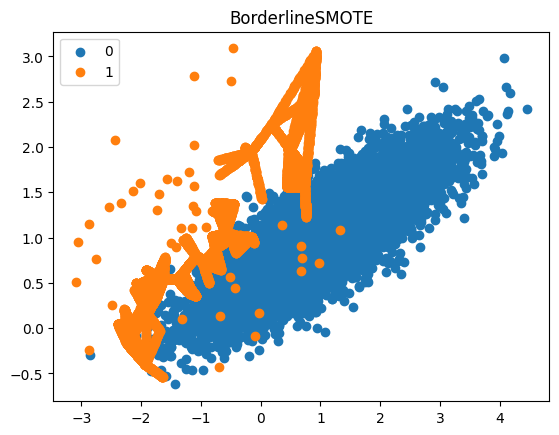

In [37]:
from imblearn.over_sampling import BorderlineSMOTE

# define the undersampling method
bsmt = BorderlineSMOTE()
# transform the dataset
X_bsmt, y_bsmt = bsmt.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y_bsmt)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y_bsmt == label)[0]
    pyplot.scatter(X_bsmt[row_ix, 0], X_bsmt[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.title('BorderlineSMOTE')
pyplot.show()

## Borderline SVM-SMOTE

A similar effect can be achieved, but instead of using KNN to select the missclassified instances, using a Support Vector Machine (SVM) algorithm instead.

Counter({0: 9900, 1: 9900})


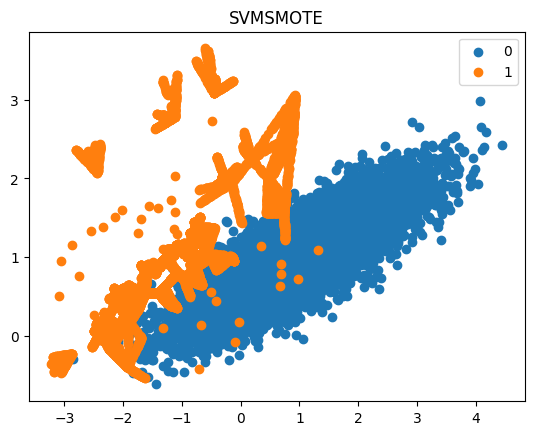

In [38]:
from imblearn.over_sampling import SVMSMOTE

# define the undersampling method
svmsmt = SVMSMOTE()
# transform the dataset
X_svmsmt, y_svmsmt = svmsmt.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y_svmsmt)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y_svmsmt == label)[0]
    pyplot.scatter(X_svmsmt[row_ix, 0], X_svmsmt[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.title('SVMSMOTE')
pyplot.show()

## Adaptive Synthetic Sampling (ADASYN)

This approach works according to the density of the minority class instances. Generating new samples is inversely proportional to the density of the minority class samples.

It generates more samples in the feature space region where minority class examples density is low or none and fewer samples in the high-density space.

Counter({0: 9900, 1: 9899})


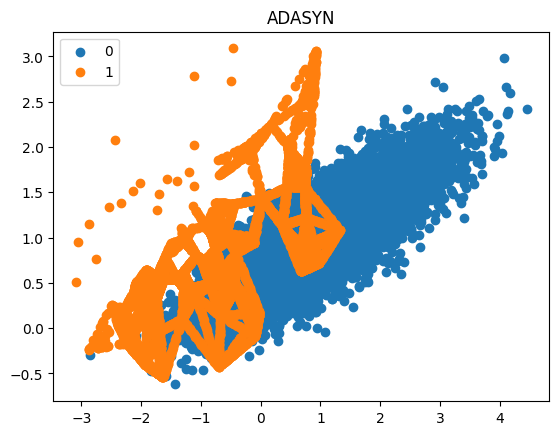

In [39]:
from imblearn.over_sampling import ADASYN

# define the undersampling method
adsyn = ADASYN()
# transform the dataset
X_adsyn, y_adsyn = adsyn.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y_adsyn)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y_adsyn == label)[0]
    pyplot.scatter(X_adsyn[row_ix, 0], X_adsyn[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.title('ADASYN')
pyplot.show()